# LAB TASKS PART 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from __future__ import print_function, division
from scipy.signal import argrelextrema

# Exercise1

## Task1

Exponential model of growth of an organism is dN/dt rN where N(t) is the population at time t and r > 0 is the growth rate.

To overcome the ideas of overcrowding and limited resources in the exponential growth model logistic equation is used. 

One dimensional logistic equation is:

dN/dt = r*N*(1-N/K) where N(t) is the population at time t, r > 0 is the growth rate and K is the carrying capacity

### Part 1

Solve the above equation analytically and plot the result in a time series manner.

#### Solution

Note: For simplicity N(t) is written as N

Analytical Solution of the given equation is given by applying the following steps

$\frac{dN}{dt} = r \times {N \times (1-\frac{N}{K})}$

Seperate the 2 variables N and t

$\frac{dN}{N(1-\frac{N}{K})} = r \times dt$

Partial Fraction Decomposition

$\frac{1}{N(1-\frac{N}{K})} = \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}}$

Substitution and Integration

$\int \frac{1}{N} + \frac{\frac{1}{K}}{1-\frac{N}{K}} dN = \int r \times dt$

Separate Integration for each term 

$\int r \times dt = rt + C_1$

$\int \frac{1}{N} dN = \ln{N} + C_2$

For $\int \frac{\frac{1}{K}}{1 - \frac{N}{K}} dN$ 

Assume $u = 1 - \frac{N}{K}$ => $du = - \frac{1}{k} dN$

$\int \frac{-du}{u} = -\ln u + C_3 = -\ln{1 - \frac{N}{K}} + C_3$

$\ln{N} - \ln{1 - \frac{N}{K}} = \ln{\frac{N}{1-\frac{N}{K}}} = rt + C$

$\frac{N}{1-\frac{N}{K}} = e^{rt + C}$

$\frac{N}{1-\frac{N}{K}}= Ae^{rt}$

Obtain the equation in terms of N

$N = Ae^{rt} \times 1 - \frac{N}{K}$

$N = Ae^{rt} - Ae^{rt} \times \frac{N}{K}$

$N + Ae^{rt} \times \frac{N}{K} = Ae^{rt}$

$N\big[1 + \frac{Ae^{rt}}{K}\big] = Ae^{rt}$

$N = \frac{Ae^{rt}}{1 + \frac{Ae^{rt}}{K}}$

To obtain a value for A, let us consider an initial condition at time $t=0$

$Ae^0 = A$

$No = \frac{A}{1 + \frac{A}{K}}$

$No = \frac{AK}{K+A}$

$No(K+A) = AK$

$NoK + NoA = AK$

$NoA - AK = -NoK$

$AK -NoA = NoK$

$A = \frac{NoK}{K - No}$

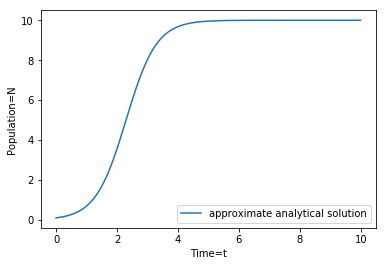

In [2]:
#Time steps: an array of values starting from 0 going up to 10, in step size of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
A = (No*K)/(K-No)
N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
# t is an array, it is the same as doing it for each element
plt.plot(t, N)
plt.legend(['approximate analytical solution'], loc='best') # draw legend
plt.xlabel('Time=t') # define label of x-axis
plt.ylabel('Population=N') # and of y-axis
plt.show()

### Part 2

Simulate it using numerical tools and compare the plots (try different solvers and step sizes)

Using scipy.integrate package function odeint

In [3]:
 def derivativeFunction(N, t, r, K):
    """Derivative functiion"""   
     # let's define the right-hand side of the differential equation
    # It must be a function of the dependent variable (N) and of the time (t), even if time does not appear explicitly
    return r*N*(1-N/K)

In [ ]:
def demo_odeint(time, No, r, K):
    #The order of the arguments for ode function: the derivative function, the initial condition, the points where we want the solution, and a list of parameters
    N = odeint(derivativeFunction, No, time, (r, K))
    # plot the solution
    plt.plot(time, N)
    plt.xlabel('Time') # define label of x-axis
    plt.ylabel('Population') # and of y-axis
    plt.legend(['Exact solution using scipy.integrate'], loc='best') # draw legend
    plt.show()


In [ ]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.01
t = np.arange(0, 10, 0.01)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)


In [ ]:
# time steps: an array of values starting from 0 going up to 10, in steps of 0.1
t = np.arange(0, 10, 0.1)
# parameters
r = 2
K = 10
# initial condition
No = 0.1
demo_odeint(t, No, r, K)



Eulers method

In [ ]:
# Logistic growth rate differential equation
def logisticGrowth(N,K,r):
    return r*N*(1-(N/K))

In [ ]:
def demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue):
    stepSize = (end-start)/nsteps
    # Create arrays to hold values of t and N
    time = np.arange(start,end+stepSize,stepSize)
    narray = np.zeros((nsteps+1,))
    # set the initial values
    time[0], narray[0] = initialValue
    # Apply Euler's method
    for i in range(1,nsteps+1):
        narray[i] = narray[i-1] + stepSize*logisticGrowth(narray[i-1], carryingCapacity, growthRate)
    return time, narray

In [ ]:
# Analytical solution
def analyticalSolution(t, No, r, K):
    No = 5.3
    r = 0.029443
    K = 189.4
    A = (No*K)/(K-No) 
    N = (A*np.exp(r*t))/(1 + ((A*np.exp(r*t))/K))
    return N


In [ ]:
def plotComparisonEulersAnalytical(time, narray, N):
    plt.plot(time, narray, label='Euler')
    plt.plot(time, N, label='Analytical' )
    plt.title( "Euler's Method Logistic Growth, steps="+str(nsteps))
    plt.xlabel('time') 
    plt.ylabel('solution')
    plt.legend(loc=4)
    plt.grid()
    plt.show()


In [ ]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

In [ ]:
start = 0
end = 300
nsteps = 50
carryingCapacity = 189.4
growthRate = 0.029443
initialValue = (0.0,5.3)
No = 5.3
time, narray = demoEulersMethod(start, end, nsteps, carryingCapacity, growthRate, initialValue)
N = analyticalSolution(time, No, growthRate, carryingCapacity)
plotComparisonEulersAnalytical(time, narray, N)

## Task 2

3-dimensional Goldbeter model for expression and regulation of the Neurospora “frequency protein” (FRQ)

For the concentrations of the mRNA (M), the “frequency protein” (FC) synthesized in the cytoplasm and the successively built up protein concentration (FN) in the nucleus, there is a system of three differential equations:

$\frac{dM}{dt} = V_s \frac{K^n}{K^n + F_N^n} - V_m \frac{M}{K_M+M}$

$\frac{dF_C}{dt} = k_s M - V_d \frac{F_C}{K_d + F_C} - k_{in}F_C + k_{out}F_N$

$\frac{dF_N}{dt} = k_{in}F_C - k_{out}F_N$

In [ ]:
def Period(state,t):
    """Function to calculate period with the default parameters given the initial state and time series in constant darkness"""
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.02
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [ ]:
def viewCircadianClock(result_odeint):
    """Function to view the circadian clock"""
    fig, axes = plt.subplots(1,1, figsize=(5, 5))
    plt.plot(result_odeint[:,1], result_odeint[:,0])
    plt.xlabel("concentration of protein in cytoplasm")
    plt.ylabel("concentration of mRNA")
    plt.show()

In [ ]:
def viewProductConcentrationEvolution(result_odeint, time):
    """Function to view the product concentration evolution over time given the result from odeint function and time series"""
    fig, axes = plt.subplots(1,1, figsize=(10, 10))
    legends = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
    plt.plot (time, result_odeint[:,0], 'b', time, result_odeint[:,1], 'g', time, result_odeint[:,2], 'r')
    plt.xlabel("time")
    plt.ylabel("product concentration")
    plt.legend(legends, loc='best') 
    plt.show()

In [ ]:
def findPeriodOfClock(state0):
    """Function to calculate the period of the clock with original parameters and initial state"""
    starttime = 0
    endtime = 1000
    intervals = 10000
    t = np.linspace(starttime, endtime, intervals)
    result_odeint = odeint(Period, state0, t)
    # Array containing the values of M
    Farray = result_odeint[:,1]
    # Get the indices of the maxima
    # Index represents the no. of steps from start time
    maxindices = argrelextrema(Farray, np.greater)
    # List of all timepoints where M(t) is maximum
    xlist = []
    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        # Get the mean period
        meanP = np.average(differences)
    return meanP

In [ ]:
state0 = [0, 0, 0]
periodOfClock = findPeriodOfClock(state0)
print("Period of the clock with original parameters is","%.2f" % periodOfClock)

In [ ]:
state0 = [0, 0, 0]
starttime = 0
endtime = 1000
intervals = 10000
t = np.linspace(starttime, endtime, intervals)
result_odeint = odeint(Period, state0, t)

Below are the plots for circadian clock and product concentration evolution with original parameters in constant darkness

In [ ]:
viewCircadianClock(result_odeint)

In [ ]:
viewProductConcentrationEvolution(result_odeint, t)

Functions related to varying kin and determining the corresponding period

In [ ]:
def periodWithVarying_kin(state,t, kin):
    """Function to calculate period with varying kin"""
    # unpack the initial state vector
    M = state[0] #concentration of mRNA
    Fc = state[1] #freuqency protein synthesised in cytoplasm
    Fn = state[2] #successively built up protein concentration
    # these are our constants
    #Vs = 2.0
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = kin
    kout = 0.1
    n = 4 #Hill number
    # compute state derivatives w.r.t time
    dM = (Vs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    dFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    dFn = kin*Fc - kout*Fn
    # return the state derivatives
    return [dM, dFc, dFn]

In [ ]:
def findPeriodBasedOnFc(minkin, maxkin,stepsize,state0, t):
    """Function to determine period by considering the protein level in cytoplasm F(t)"""
    Ps = []
    kinvalues = np.linspace(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Farray = result_odeint[:,1]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Farray, np.greater)
         # List of all timepoints where F(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x, meanP, result_odeint, t, Farray[maxindices], t[maxindices], maxindices))
    return Ps

In [ ]:
def findPeriodBasedOnM(minkin, maxkin,stepsize,state0, t):
    """Function to determine period by considering the protein level in cytoplasm  M(t)"""
    Ps = []
    kinvalues = np.linspace(minkin,maxkin,stepsize)
    # Iterate through all the kin values
    for x in kinvalues:
        result_odeint = odeint(periodWithVarying_kin, state0, t, args=(x,))
        # Array containing the values of M
        Marray = result_odeint[:,0]
        # Get the indices of the maxima
        # Index represents the no. of steps from start time
        maxindices = argrelextrema(Marray, np.greater)
         # List of all timepoints where M(t) is maximum
        xlist = []
        if len(maxindices[0]) > 1:
            for item in maxindices[0]:
                xlist.append(t[item])
        # Get the differences between values
        differences = np.diff(xlist)
        #print(differences)
        # Get the mean period
        meanP = np.average(differences)
        #print(meanP)
        if 21.48 < meanP < 21.53:
            # Append a tuple of (kin, mean period)
            Ps.append((x,meanP, result_odeint, t, Marray[maxindices], t[maxindices], maxindices))
    return Ps

In [ ]:
def viewResultForPeriodsWithVarying_kin(results):
    """Function to view the plots given the result from function finding the periods with varying kin"""
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        print("kin is ", "%.4f"%kin, " and period is ", "%.2f"%period)
        pointsWithPeaks = result[4]
        timeWithPeaks = result[5]
        maxindices = result[6]
        viewCircadianClock(result_odeint)
        
              
        fig, axes = plt.subplots(1,1, figsize=(10, 10))
        labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
        plt.plot (time, result_odeint[:,0], 'blue', time, result_odeint[:,1], 'green', time, result_odeint[:,2], 'red')
        plt.plot(timeWithPeaks, pointsWithPeaks, '.', c= 'black')
        plt.legend(labels, loc='best') 
        plt.xlabel("time")
        plt.ylabel("product concentration")
        plt.show()       
        
       


In [ ]:
def viewResultForPeriodsWithVarying_kinShow(results):
    """Function to view the plots given the result from function finding the periods with varying kin"""
    for result in results:
        kin = result[0]
        period = result[1]
        result_odeint = result[2]
        time = result[3]
        #print("kin is ", "%.4f"%kin, " and period is ", "%.2f"%period)
        pointsWithPeaks = result[4]
        timeWithPeaks = result[5]
        maxindices = result[6]
        #viewCircadianClock(result_odeint)
        fig, axes = plt.subplots(1,1, figsize=(10, 10))
        #labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
        plt.plot (time, result_odeint[:,1], 'green')
        plt.plot(timeWithPeaks, pointsWithPeaks, '.', c= 'black')
        #plt.legend(labels, loc='best') 
        plt.xlabel("time")
        plt.ylabel("protein concentration in cytoplasm")
        plt.show()       
        

In [ ]:
def plotEves():
    minkin = 0.01
    maxkin = 0.1
    stepsize = 1000
    state0 = [0, 0, 0]
    starttime = 0
    endtime = 1000
    intervals = 10000
    t = np.linspace(starttime, endtime, intervals)
    results = findPeriodBasedOnFc(minkin, maxkin,stepsize,state0, t)
    currentresult = results[0]
    Fcmaxindices = currentresult[6] #indices
    print(Fcmaxindices)
    Mresults = findPeriodBasedOnM(minkin, maxkin,stepsize,state0, t)
    Mcurrentresult = Mresults[0]
    Marrayvalues = Mcurrentresult[2][:,0][Fcmaxindices]
    Farrayvalues = currentresult[4]
    plt.plot(currentresult[2][:,1],Mcurrentresult[2][:,0])
    plt.plot(Farrayvalues,Marrayvalues,'.', c = 'black')
    plt.show()
    

    

In [ ]:
minkin = 0.01
maxkin = 0.1
stepsize = 1000
state0 = [0, 0, 0]
starttime = 0
endtime = 1000
intervals = 10000
t = np.linspace(starttime, endtime, intervals)

Results for period with varying kin based on protein concentration 

In [ ]:
resultsFc = findPeriodBasedOnFc(minkin, maxkin, stepsize, state0, t)

In [ ]:
print("Time points where Fc is maximal")
for value in resultsFc[0][5]:
    print("%.2f" % value, end = ", ")

In [ ]:
viewResultForPeriodsWithVarying_kin(resultsFc)

In [ ]:
viewResultForPeriodsWithVarying_kinShow(resultsFc)

In [ ]:
plotEves()

Results for period with varying kin based on mRNA concentration 

In [ ]:
resultsM = findPeriodBasedOnM(minkin, maxkin, stepsize, state0, t)

In [ ]:
viewResultForPeriodsWithVarying_kin(resultsM)

Considering the results of varying kin and determining period based on mRNA and protein level in cytoplasm we conclude that when the value of kin is 0.0244 then the period becomes 21.51.

## Task 3

In [ ]:
def whichVs(t,light,dark,step):
    """Function to determine which Vs step to be used"""
    # Normalize by 24 h
    normalized = t-(t//24)*24
    if normalized <= dark:
        # Dark
        currentVs = 1.5
    else:
        currentVs= 1.5 + step
    return currentVs

In [ ]:
def periodVaryingVsStep(state, t, s, light, dark):
    """Function for finding period with specified Vs step size"""
    # Initial states
    M = state[0] # mRNA concentration
    Fc = state[1] # frequency protein synthesised in cytoplasm
    Fn = state[2] # Successively built up protein concentration
    # Constants/Parameters
    step = s
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.024 # Use the kin that produces a period of 21.5 h (intrinsic clock)
    #kin = 0.02 # Original
    kout = 0.1
    n = 4 #Hill number
    # Specific Vs values depending on current time t
    currentVs = whichVs(t,light,dark,step)
    # Compute state derivatives w.r.t time
    solM = (currentVs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    solFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    solFn = kin*Fc - kout*Fn
    # Return state derivatives
    return [solM, solFc, solFn]


In [ ]:
def calculatePeriod(array,t):
    # Exclude the first two peak
    #maxindices = argrelextrema(array[3:], np.greater)
    maxindices = argrelextrema(array, np.greater)
    # List of all timepoints where M(t) is maximum
    xlist = []
    if len(maxindices[0]) > 1:
        for item in maxindices[0]:
            xlist.append(t[item])
    # Get the differences between values
    # Represents local period
    differences = np.diff(xlist)
    meanP = np.mean(differences)
    return meanP


In [ ]:
def findVsStep(state0, light,dark, t):

    # Limits of the step size for Vs
    minstep = 0.0
    maxstep = 0.2
    step = 1000
    allsteps = np.linspace(minstep,maxstep,step)
    stepPlot = []
    meanPPlot = []
    closeto24 = []
    
    # Iterate through all step sizes
    for currentstep in allsteps:
        state = odeint(periodVaryingVsStep, state0, t, args=(currentstep,light,dark))
        Fcarray = state[:,1]
        meanP = calculatePeriod(Fcarray,t)
        if abs(meanP-24.0) <= 0.02:
            closeto24.append((currentstep, meanP))
            break
        stepPlot.append(currentstep)
        meanPPlot.append(meanP)
    return stepPlot, meanPPlot, closeto24


In [ ]:
def plotResultsForVs(stepplot, meanpplot, closeto24, sate0, light, dark):
    
    if light == 12.0 and dark == 12.0:
        plt.figure(1)
        plt.plot(stepplot,meanpplot)
        plt.title('Neurospora Clock: 12 h/12 light/dark Conditions')
        plt.xlabel("Minimum step size of Vs")
        plt.ylabel("Mean Period")
        plt.show()

    print("Vsstep and meanP values: ")
    for tup in closeto24:
        print("%.4f"%tup[0], "%.4f"%tup[1])
        # For 12 h/12 h conditions
        step = tup[0]
        # Plot using the parameters that produce 24 h
        results12h = odeint(periodVaryingVsStep, state0, t, args=(step,light,dark))
        Marray12h = results12h[:,0]
        Fcarray12h = results12h[:,1]
        Fnarray12h = results12h[:,2]
        fig, axes = plt.subplots(1,1, figsize=(5, 5))
        plt.title('Neurospora Clock: ' + str(light) + 'h/' + str(dark) + 'h light/dark Conditions \n M(t) vs. Fc(t) \n Period = 24 h')
        plt.plot(Fcarray12h,Marray12h)
        plt.ylabel("M(t)")
        plt.xlabel("F(t)")
        plt.show()
        
        fig, axes = plt.subplots(1,1, figsize=(10, 10))
        labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
        plt.title('Neurospora Clock: '+ str(light) + 'h/' + str(dark) + 'h light/dark Conditions')
        # Plot the M(t), Fc(t), and Fn(t) concentrations over time
        plt.plot(t, Marray12h, 'blue', t, Fcarray12h, 'green', t, Fnarray12h, 'red')
        # Plot the light and dark stimuli 
        # 1 if light, 0 if dark
        vsarray = [whichVs(i,light,dark,step) for i in t]
        plt.plot(t, vsarray, '--', c='orange')
        plt.ylabel("Concentration")
        plt.xlabel("Time")
        plt.legend(labels, loc='best')
        plt.show()

In [ ]:
light = 12
dark = 12
step = 0.5
results = odeint(periodVaryingVsStep, state0, t, args=(step,light,dark))
Marray = results[:,0]
Fcarray = results[:,1]
Fnarray = results[:,2]
fig, axes = plt.subplots(1,1, figsize=(5, 5))
plt.title('Neurospora Clock: ' + str(light) + 'h/' + str(dark) + 'h light/dark Conditions \n M(t) vs. Fc(t) \n Period = 24 h')
plt.plot(Fcarray,Marray)
plt.ylabel("M(t)")
plt.xlabel("F(t)")
fig, axes = plt.subplots(1,1, figsize=(10, 7))
labels = ["concentration of mRNA", "protein level in cytoskeleton", "protein level in nucleus"]
plt.title('Neurospora Clock: '+ str(light) + 'h/' + str(dark) + 'h light/dark Conditions')
# Plot the M(t), Fc(t), and Fn(t) concentrations over time
plt.plot(t, Marray, 'blue', t, Fcarray, 'green', t, Fnarray, 'red')
vsarray = [whichVs(i,light,dark,step) for i in t]
plt.plot(t, vsarray, '--', c='orange')
plt.ylabel("Concentration")
plt.xlabel("Time")
plt.legend(labels, loc='best')
plt.show()

period = calculatePeriod(Fcarray,t)
print("The period for 12 h/12 h with step = 0.5 is",period)


In [ ]:
state0 = [0, 0, 0]
t = np.linspace(0, 500, 10000)
light = 12.0
dark = 12.0
stepplot, meanpplot, closeto24 = findVsStep(state0, light, dark, t)
plotResultsForVs(stepplot, meanpplot, closeto24, state0, light, dark)

## Phase

In [ ]:
def whichVsPhase(t,light,dark,step,phase):
    # Normalize by 24 h
    vs = 1.5
    normalized = t-(t//24)*24
    if ((normalized-phase) >= 0) and ((normalized) < (light+phase)):
        vs = 1.5 + step
    return vs

In [ ]:
def lightDarkWithPhase(t,light,dark,phase):
    # Normalize by 24 h
    #t = t-phase
    normalized = t-(t//24)*24
    #print(normalized)
    if ((normalized-phase) >= 0) and ((normalized) < (light+phase)):
        #print(((normalized-phase) < (light+phase)))
        status = "light"
    else:
        status= "dark"
    return status

In [ ]:
def periodVaryingVsStepPhaseOrig(state, t, s, light, dark, phase):
    """Function for finding period with specified Vs step size"""
    # Initial states
    M = state[0] # mRNA concentration
    Fc = state[1] # frequency protein synthesised in cytoplasm
    Fn = state[2] # Successively built up protein concentration
    # Constants/Parameters
    step = s
    Vs = 1.5
    Vm = 1.5
    Vd = 1.0
    ks = 0.5
    K = 0.2
    Km = 0.15
    Kd = 0.15
    kin = 0.0244 # Use the kin that produces a period of 21.5 h (intrinsic clock)
    #kin = 0.02 # Original
    kout = 0.1
    n = 4 #Hill number
    # Specific Vs values depending on current time t
    #currentVs = whichVsPhase(t,light,dark,step, phase)
    currentVs = whichVsPhase(t,light,dark,step, phase)
    # Compute state derivatives w.r.t time
    solM = (currentVs*(K**n))/(K**n+Fn**n)-(Vm*M/(Km+M))
    solFc = ks*M - (Vd*(Fc/(Kd+Fc))) - (kin*Fc) + (kout*Fn)
    solFn = kin*Fc - kout*Fn
    # Return state derivatives
    return [solM, solFc, solFn]

In [ ]:
# For 12 h/12 h conditions
state0 = [0, 0, 0]
light = 12.0
dark = 12.0
step = 0.0472
t = np.linspace(0, 120, 1000)
phases = [0,3,7,10]
plt.figure()
for x in phases:
    #print("PHASE: " , x)
    # Plot using the parameters that produce 24 h
    results = odeint(periodVaryingVsStepPhaseOrig, state0, t, args=(step, light, dark, x))
    Marray = results[:,0]
    Fcarray = results[:,1]
    Fnarray = results[:,2]
    meanP = calculatePeriod(Fcarray,t)
    #print("MEAN PERIOD",meanP)
    
    if x == 0:
        color = "blue"
        
    elif x == 3:
        color = "green"
       
    elif x==7:
        color = "red"
        
    else:
        color = "purple"
    plt.title('Neurospora Clock: ' + str(light) + 'h/' + str(dark) + 'h light/dark Conditions \n Phase: ' + str(x))
    plt.plot(t, Fcarray, color)
    plt.xlabel("Fc")
    plt.ylabel("Time")
    vsarray = [lightDarkWithPhase1Vs(i,light,dark,step,x) for i in t]
    #plt.plot(t, vsarray, '--', c='orange')
plt.show()

## Task 4

In [ ]:
state0 = [0, 0, 0]
light = 18.0
dark = 6.0
t = np.linspace(0, 500, 10000)
stepplot, meanpplot, closeto24 = findVsStep(state0, light,dark, t)
plotResultsForVs(stepplot, meanpplot, closeto24, state0, light, dark)

In [ ]:
state0 = [0, 0, 0]
light = 16.0
dark = 8.0
t = np.linspace(0, 500, 10000)
stepplot, meanpplot, closeto24 = findVsStep(state0, light, dark, t)
plotResultsForVs(stepplot, meanpplot, closeto24, state0, light, dark)

The minimal Vs step increase in order to achieve a period of approximately 24 hours in 3 cases is as follows:

12 hours of light and 12 hours of dark --> 0.0472 

18 hours of light and 6 hours of dark --> 0.1397 

16 hours of light and 8 hours of dark --> 0.0691 